In [10]:
import pickle
import requests
import json

## Best range functionality 
input parameters
- time_fraction: Expected time fraction to be in the active market.
- time_horizon: Time in the pool (units: days).
- coingecko_kwargs: argument to load data from coingecko, in this example we load bitcoin vs usd token for the last 5000 days.

output:
- lower_bound, upper_bound: smallest range to fulfill the input parameters.

In [8]:
url = 'http://0.0.0.0:8000/best_range'
inp = {
    "time_fraction": 0.5, 
    "time_horizon": 30,
    "coingecko_kwargs": {'id': 'bitcoin', 'vs_currency': 'usd', 'days': '5000'}
}

res = requests.post(url, headers = {'Content-type': 'application/json'}, json=inp)
data = json.loads(res.json())
print(data)

{'lower_bound': 0.93, 'upper_bound': 1.09}


Example how to plot the results from best range:

token data kwargs:  {'id': 'bitcoin', 'vs_currency': 'usd', 'days': '700'}


Text(0.5, 1.0, 'Time horizon 30days')

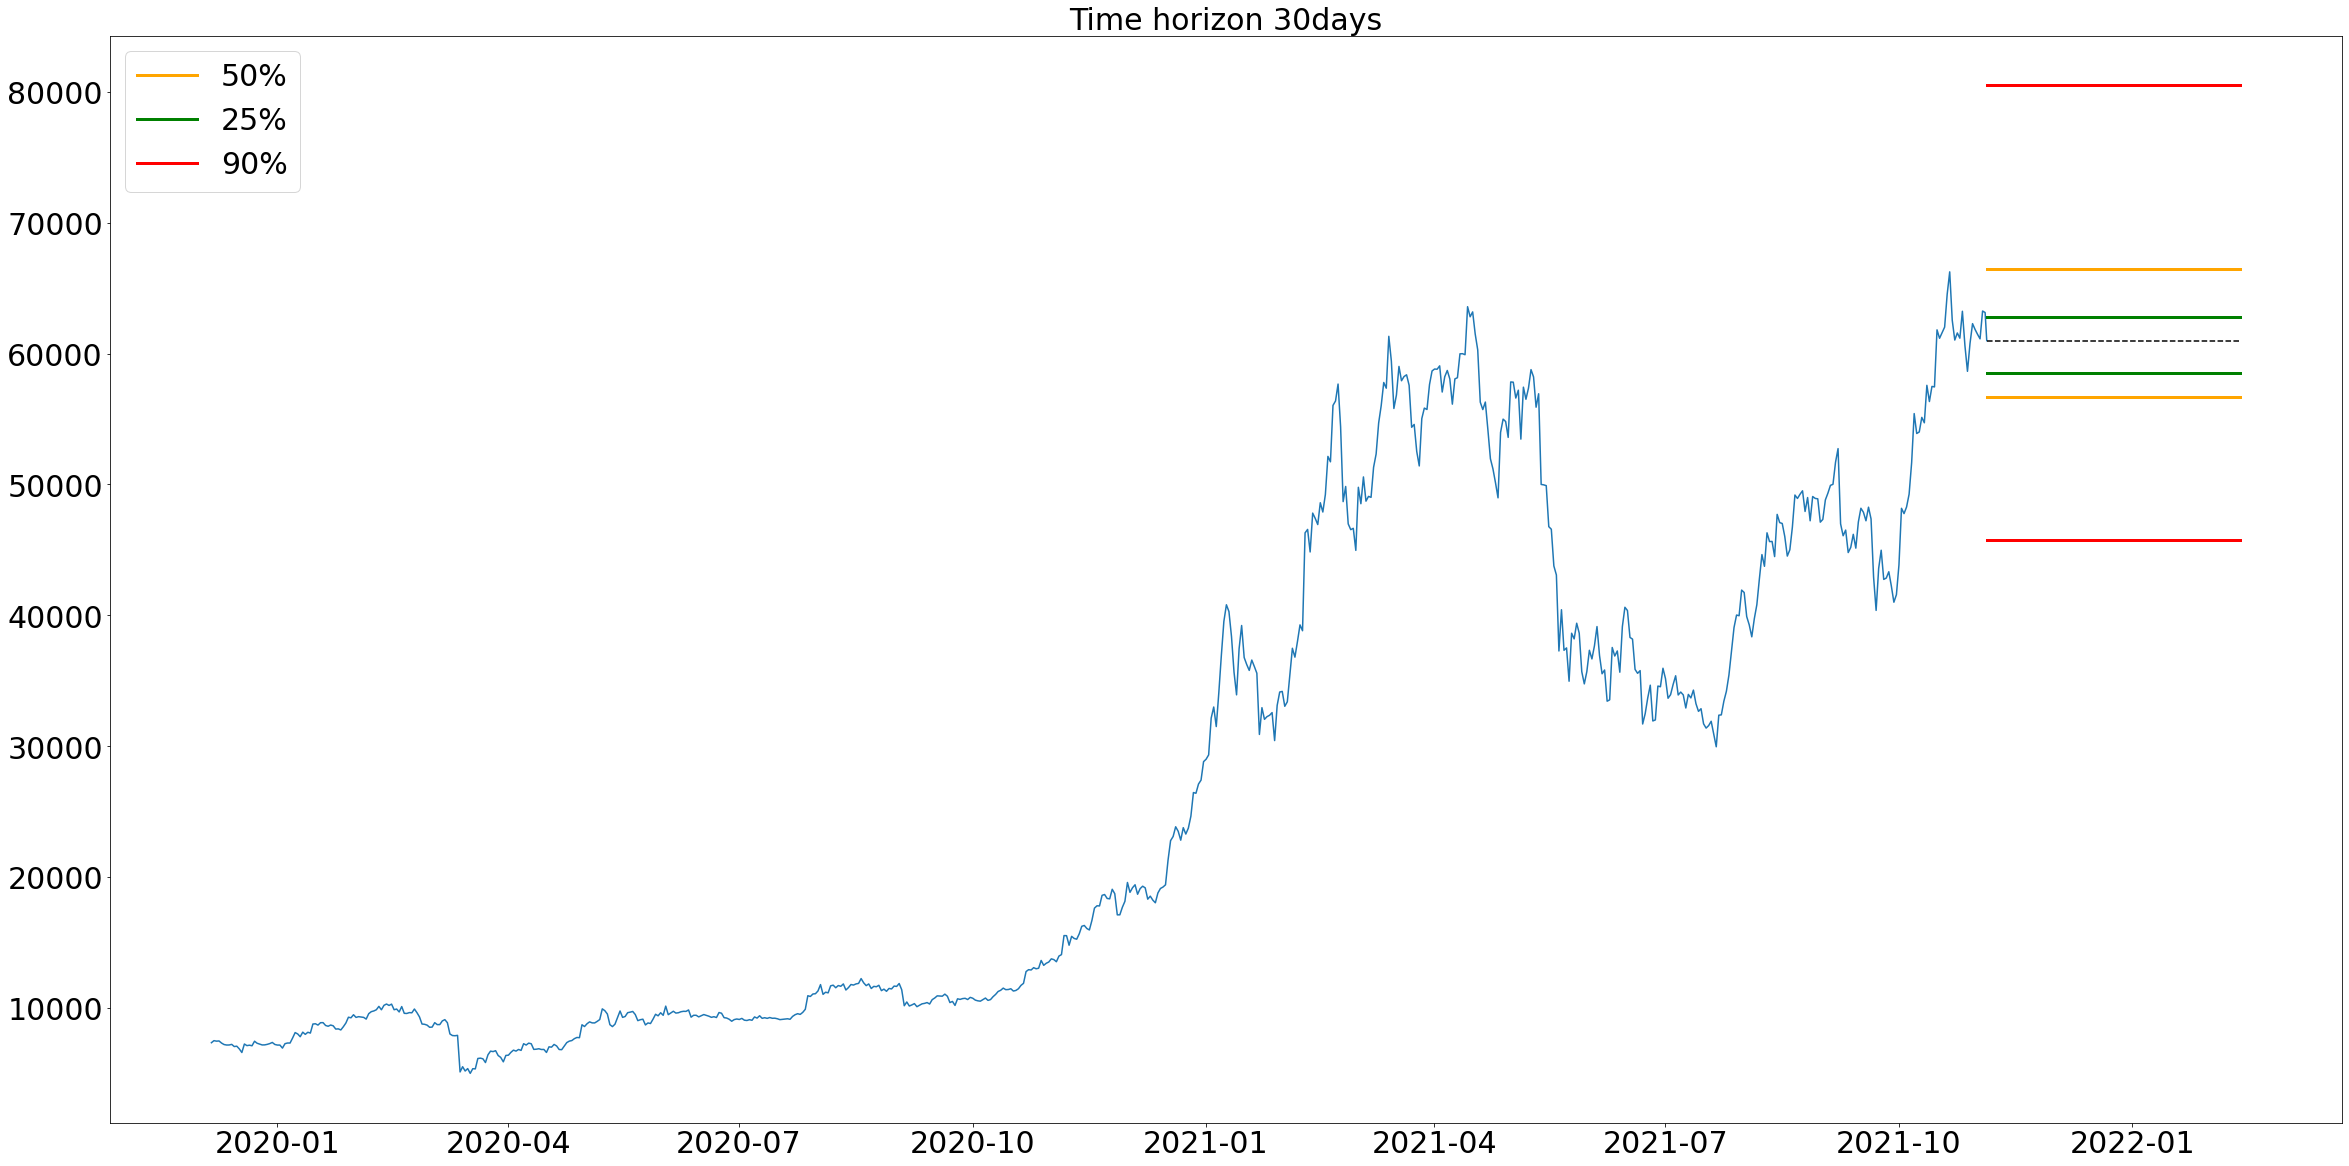

In [25]:
from src.models.import_token_timeseries import token_data
from matplotlib import pylab as plt
import matplotlib
f, ax = plt.subplots(1,1,figsize=(40,20))
time, token_value = token_data(**cg_kwargs)
time=[datetime.datetime.fromtimestamp(t/1000.0) for t in time]

today = time[-1]
dt = time[1] - time[0]

inp["time_fraction"] = 0.5
inp['time_horizon'] = 30


res = requests.post(url, headers = {'Content-type': 'application/json'}, json=inp)
res50 = json.loads(res.json())
lower_range50 = res50['lower_bound']
upper_range50 = res50['upper_bound']

inp["time_fraction"] = 0.25
res = requests.post(url, headers = {'Content-type': 'application/json'}, json=inp)
res25 = json.loads(res.json())
lower_range25 = res25['lower_bound']
upper_range25 = res25['upper_bound']

inp["time_fraction"] = 0.90
res = requests.post(url, headers = {'Content-type': 'application/json'}, json=inp)
res90 = json.loads(res.json())
lower_range90 = res90['lower_bound']
upper_range90 = res90['upper_bound']




font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 30}

matplotlib.rc('font', **font)

ax.plot(time, token_value)
ax.plot([today, today + dt*time_horizon], [token_value[-1], token_value[-1]], 
        c='black', ls='--')
ax.plot([today, today + dt*time_horizon], [token_value[-1]*lower_range50, token_value[-1]*lower_range50], 
        c='orange', lw='3', label='50%')
ax.plot([today, today + dt*time_horizon], [token_value[-1]*upper_range50, token_value[-1]*upper_range50], 
        c='orange', lw='3')

ax.plot([today, today + dt*time_horizon], [token_value[-1]*lower_range25, token_value[-1]*lower_range25], 
        c='green', lw='3', label='25%')
ax.plot([today, today + dt*time_horizon], [token_value[-1]*upper_range25, token_value[-1]*upper_range25], 
        c='green', lw='3')

ax.plot([today, today + dt*time_horizon], [token_value[-1]*lower_range90, token_value[-1]*lower_range90], 
        c='red', lw='3', label='90%')
ax.plot([today, today + dt*time_horizon], [token_value[-1]*upper_range90, token_value[-1]*upper_range90], 
        c='red', lw='3')
ax.legend()
ax.set_title("Time horizon " + str((dt*inp['time_horizon']).days) + "days",fontsize=30)